# BitPredict



## Get the data

Source: [Coindesk](https://www.coindesk.com/price/bitcoin/)

In [47]:
!wget https://raw.githubusercontent.com/katsoglou/Time_Series_Forecasting-BitPredict/main/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-10-31 12:55:58--  https://raw.githubusercontent.com/katsoglou/Time_Series_Forecasting-BitPredict/main/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175721 (172K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 171.60K  --.-KB/s    in 0.02s   

2023-10-31 12:55:58 (8.34 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [175721/175721]



## Importing time series with pandas

In [48]:
# With pandas
import pandas as pd

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])  # Parse the 'Date' column and tell pandas column 1 is a DateTime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [50]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [51]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


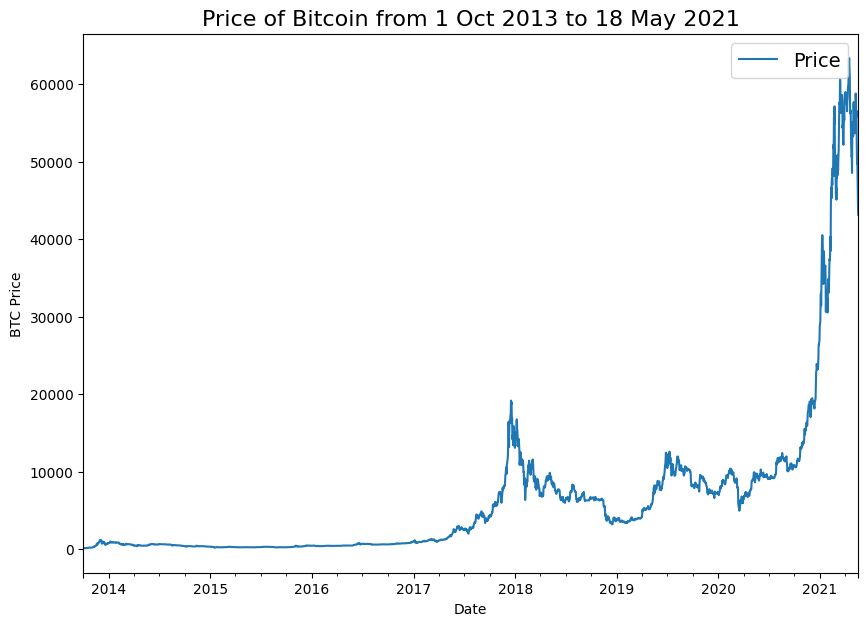

In [52]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

## Format Data Part 1: Creatining train and test sets for time series data

In [53]:
# Get bitcoin data arrays
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps, prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
        '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

*Note*: We will not split the data randomly but we will use Time series split!!

In [54]:
split_size = int(len(prices) * 0.8) # 80% train, 20% test
print(f"the limit: {split_size}, and the total number of data: {len(prices)}")

the limit: 2229, and the total number of data: 2787


In [55]:
# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]
print(f"the lenght of X_train: {len(X_train)} and thelenght of X_test: {len(X_test)}, the sum of those: {len(X_train) + len(X_test)}")

the lenght of X_train: 2229 and thelenght of X_test: 558, the sum of those: 2787


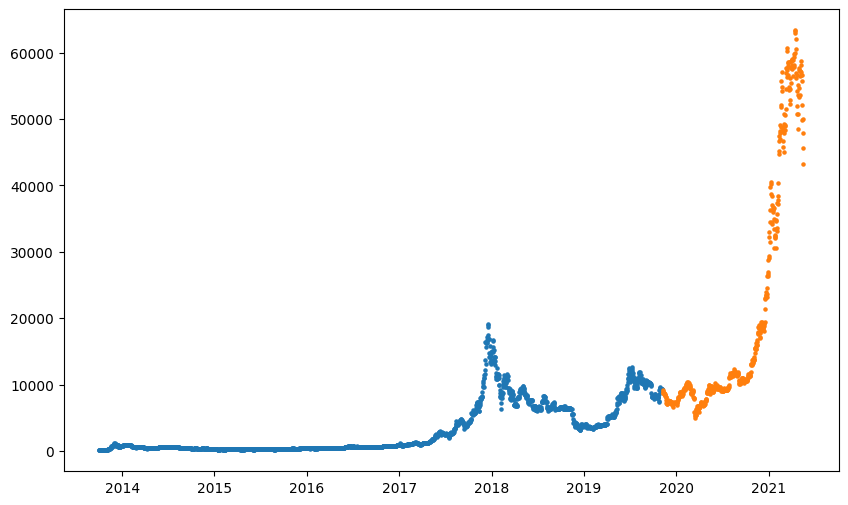

In [56]:
# Plot the train and the test data:
plt.figure(figsize=(10, 6))
plt.scatter(x=X_train, y=y_train, s=5, label="Train data")
plt.scatter(x=X_test, y=y_test, s=5, label="Test data")

## Create a Plotting Function

In [57]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  plot timesteps (a sereis of point in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (settin a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values
  """

  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

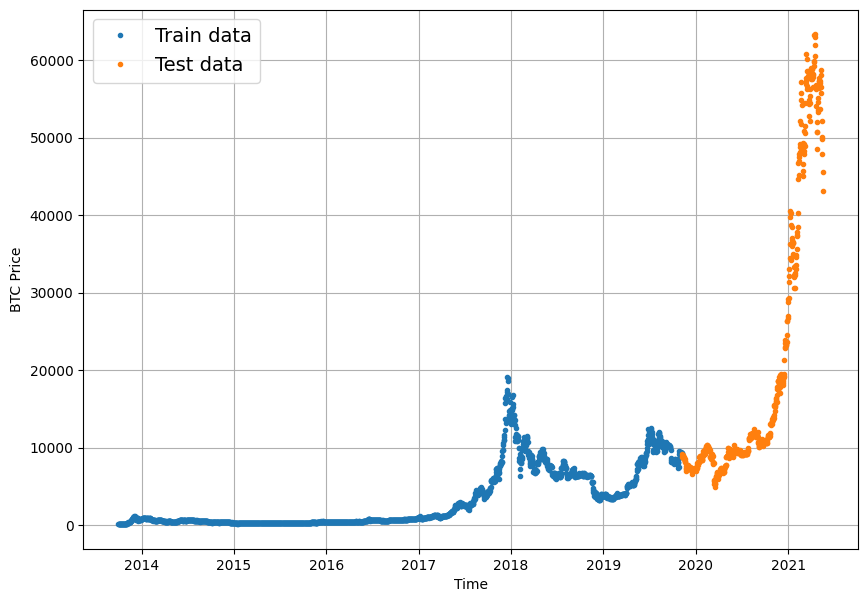

In [58]:
# Test our plottin function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

0.	Naïve model (baseline)
1.	Dense model	, Horizon=1, Window=7
2.	Same as 1, Horizon=1, Window=30
3.	Same as 1, Horizon	7	30	NA
4.	Conv1D
5.	LSTM
6.	Same as 1 (but with multivariate data)
7.	N-BEATs Algorithm
8.	Ensemble (multiple models optimized on different loss functions)
9.	Future prediction model (model to predict future values)
10.	Same as 1 (but with turkey 🦃 data introduced)

*Note*:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window** = number of timesteps we're going to use to predict **Horizon**

## Model_0: Naive forecast (baseline)

The formula look like this:
$$\hat{y}_{t} = y_{t-1}$$

This means that:

The prediction at the timestep `t` (y-hat) is equal to the value at timestep `t-1`  (the previous timestep).

In [59]:
# Create a naive forecast
naive_forecast = y_test[:-1]  # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:]  # View frist 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

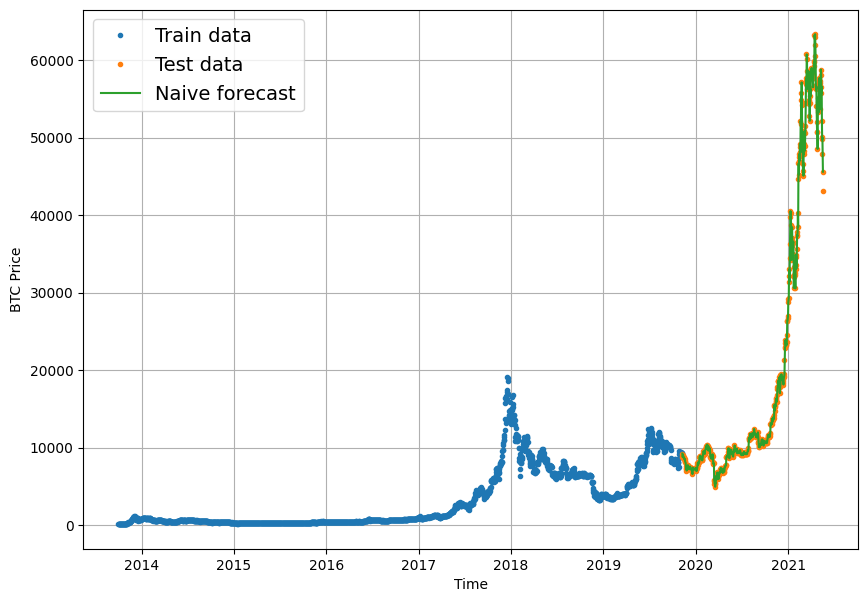

In [60]:

# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");